<a href="https://colab.research.google.com/github/PedroMatumoto/AI_Notebooks/blob/main/KaggleBaseLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade: Predição dos Gastos Médicos de Clientes

Uma seguradora deseja compreender os fatores que influenciam os custos médicos dos clientes para otimizar o cálculo de preços e gestão de riscos. Nesta atividade, você irá treinar um modelo de regressão linear para prever os gastos médicos anuais de indivíduos com base em suas características.



### Introdução

#### Regressão Linear

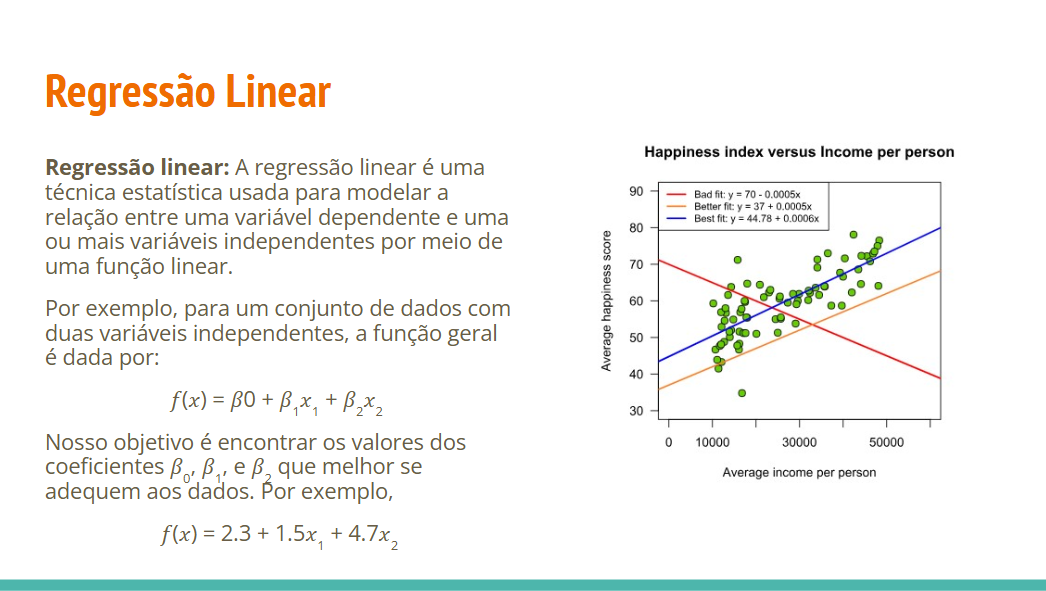

#### Métrica de Avaliação

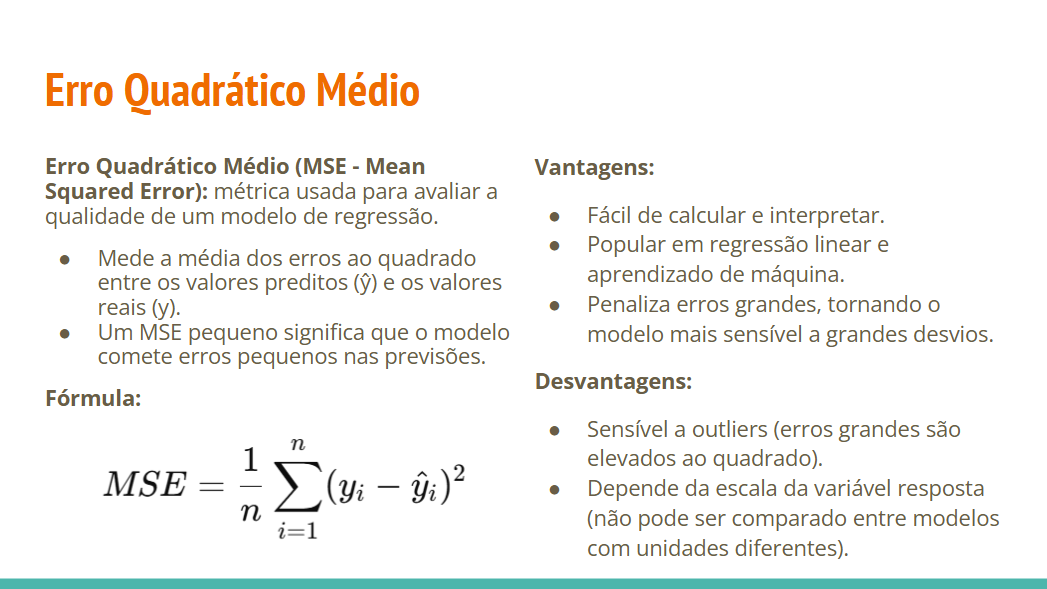

## Atividade

Os custos médicos de um indivíduo são influenciados por diversos fatores, como idade, índice de massa corporal (IMC), tabagismo e região de residência. Para uma operadora de saúde, prever com precisão esses custos é fundamental para garantir a sustentabilidade financeira e a precificação justa dos planos de seguro.

Nesta atividade, você irá desenvolver um modelo preditivo para estimar os gastos médicos futuros de novos segurados, utilizando os atributos disponíveis no conjunto de dados. Além disso, será possível analisar quais variáveis têm maior impacto nos custos, permitindo uma melhor compreensão dos fatores que elevam as despesas médicas.

Os dados para este estudo estão disponíveis no seguinte link: [Medical Insurance Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction)

### Passos da Atividade

#### 1. Preparação e Análise Exploratória dos Dados
1. **Carregar o arquivo CSV** e visualizar as primeiras linhas.
2. **Verificar valores ausentes** e tratá-los, se necessário.
3. **Gerar estatísticas descritivas** para entender a distribuição dos dados.
4. **Criar gráficos exploratórios** para visualizar relações entre as variáveis.

#### 2. Processamento dos Dados
5. **Transformar variáveis categóricas** em numéricas.
6. **Dividir os dados** em **80% para treino e 20% para teste**.

#### 3. Treinamento do Modelo
7. **Treinar um modelo de Regressão Linear** para prever os custos médicos.
8. **Analisar os coeficientes do modelo** e interpretar o impacto de cada variável.

#### 4. Avaliação do Modelo
9. **Calcular métricas de desempenho**, incluindo:
   - **Erro Quadrático Médio (MSE)**
   - **Erro Absoluto Médio (MAE)**
   - **Coeficiente de Determinação (R²)**

10. **Gerar um gráfico de dispersão** comparando os valores reais e preditos.

#### 5. Extra: Exploração de Transformações de Variáveis
11. **Explorar diferentes transformações de variáveis** para avaliar o impacto nos resultados do modelo:
    - Aplicar **transformações logarítmicas** para capturar possíveis comportamentos exponenciais e reduzir assimetrias na distribuição.
    - Considerar **transformações quadráticas** para modelar relações não lineares entre as variáveis.
    - Testar **padronização ou normalização** das variáveis numéricas (`age`, `bmi`, etc.) para melhorar a estabilidade do modelo.
    - Criar **interações entre variáveis**, como `bmi * smoker`, para capturar efeitos combinados.
12. **Reajustar o modelo** com as variáveis transformadas e comparar os resultados com a versão original.


## Carregando arquivo

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
df = pd.read_csv('Medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## Verificando dados

In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [13]:
# valores únicos de region
print(df['region'].unique())

# valores únicos de sexo
print(df['sex'].unique())

# valores únicos de smokerprint
(df['smoker'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']


array(['yes', 'no'], dtype=object)

## Gráficos exploratórios

<Axes: xlabel='age'>

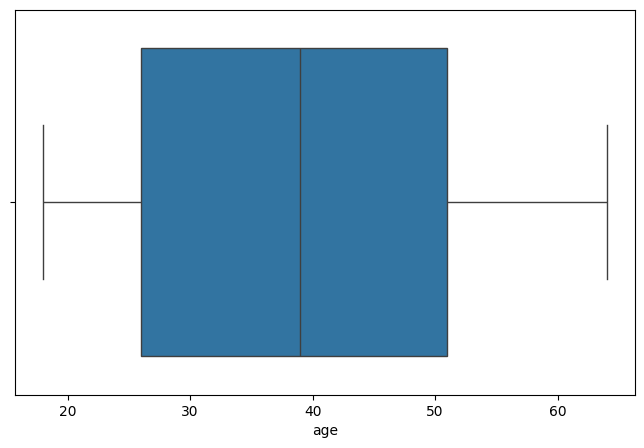

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])

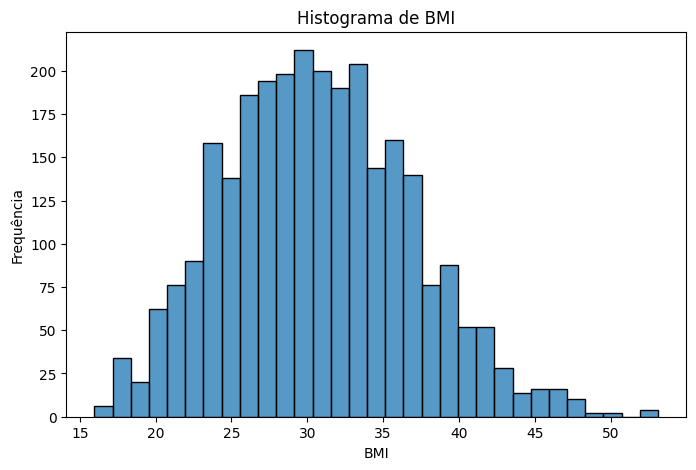

In [21]:
# Plotando o histograma de charges
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'])
plt.title('Histograma de BMI')
plt.xlabel('BMI')
plt.ylabel('Frequência')
plt.show()

# Transformado tipos de variável

In [47]:
# transformando region e variável dummy
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,False,True,False,False,False
2768,21,34.600,0,2020.17700,False,False,True,False,False
2769,19,26.030,1,16450.89470,True,False,False,True,True
2770,23,18.715,0,21595.38229,True,False,False,True,False


In [48]:
x = df.drop(columns=['charges'])
y = df['charges']


In [49]:
scaler = StandardScaler()

X_normalized = scaler.fit_transform(x)

# Convertendo as features normalizadas de volta para um DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=x.columns)

# Adicionando a variável de saída (price) de volta ao dataset
df = X_normalized.copy()
df['charges'] = y.reset_index(drop=True)

df.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,charges
0,-1.428353,-0.457114,-0.907084,-0.561240,-0.617944,1.747178,-1.014536,1.978609,16884.92400
1,-1.499381,0.500731,-0.083758,-0.561240,1.618270,-0.572351,0.985673,-0.505406,1725.55230
2,-0.789099,0.375085,1.562893,-0.561240,1.618270,-0.572351,0.985673,-0.505406,4449.46200
3,-0.433959,-1.304814,-0.907084,1.781768,-0.617944,-0.572351,0.985673,-0.505406,21984.47061
4,-0.504987,-0.297201,-0.907084,1.781768,-0.617944,-0.572351,0.985673,-0.505406,3866.85520


In [51]:
# Dividindo o dataset em 80% treino e 20% teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {len(train_df)}")
print(f"Tamanho do conjunto de teste: {len(test_df)}")

Tamanho do conjunto de treino: 2217
Tamanho do conjunto de teste: 555


In [52]:
# Definindo e ajustando um modelo de regressão
model = smf.ols(formula='charges ~ age + bmi + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes',
                data=train_df).fit()

In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     844.2
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:27:46   Log-Likelihood:                -22432.
No. Observations:                2217   AIC:                         4.488e+04
Df Residuals:                    2208   BIC:                         4.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.317e+04    127.716  

In [55]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(test_df)
y_true = test_df['charges']

# Calculando o Erro Quadrático Médio
mse = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio: {mse:.2f}")

Erro Quadrático Médio: 39933194.55


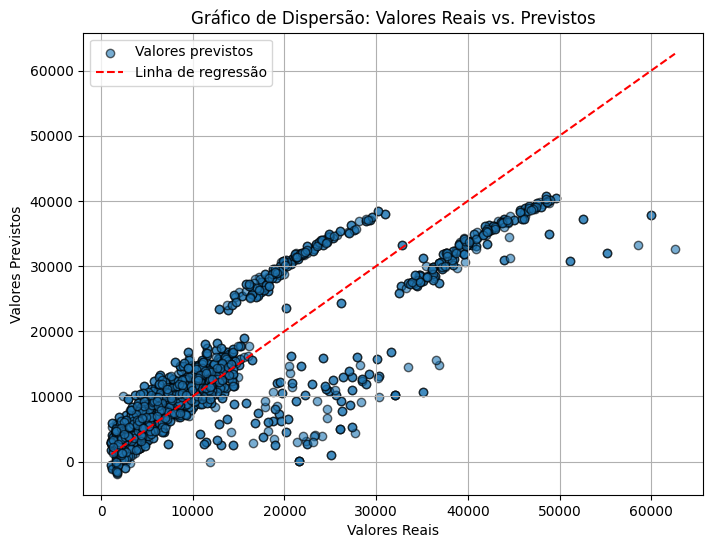

In [56]:
# Valores reais e previstos
y_real = train_df['charges']
y_pred = model.predict(train_df)

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_real, y_pred, alpha=0.6, edgecolors='k', label='Valores previstos')

# Linha de regressão
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--', label='Linha de regressão')

# Personalização do gráfico
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previstos')
plt.legend()
plt.grid(True)

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     929.6
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:34:13   Log-Likelihood:                -1305.3
No. Observations:                2217   AIC:                             2629.
Df Residuals:                    2208   BIC:                             2680.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0954      0.009  

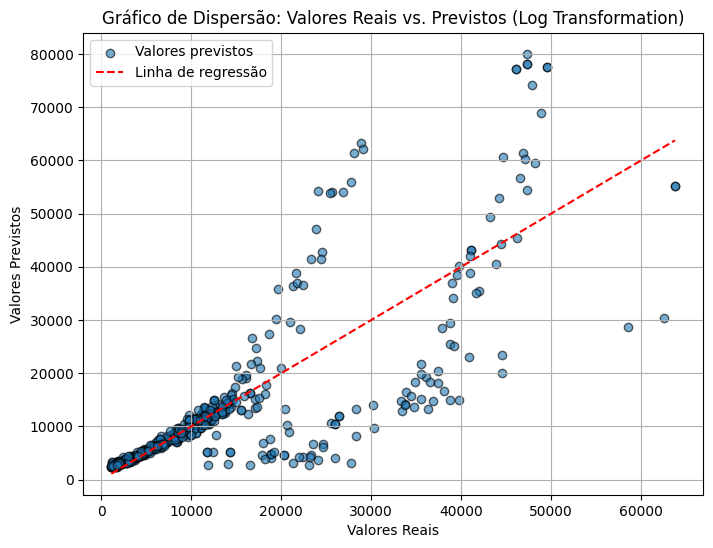

In [57]:

# Aplicando transformação logarítmica à variável 'charges'
df['log_charges'] = np.log1p(df['charges'])

# Removendo a variável original 'charges'
df = df.drop('charges', axis=1)

# Dividindo o dataset em treino e teste após a transformação
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Treinando o modelo com a variável transformada
model_log = smf.ols(formula='log_charges ~ age + bmi + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes',
                    data=train_df).fit()

print(model_log.summary())

# Fazendo previsões no conjunto de teste com o modelo transformado
y_pred_log = model_log.predict(test_df)

# Aplicando a transformação inversa para obter as previsões na escala original
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(test_df['log_charges'])


# Calculando o Erro Quadrático Médio para o modelo transformado
mse_log = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio (Log Transformation): {mse_log:.2f}")

# Gráfico de dispersão para o modelo transformado
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', label='Valores previstos')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Linha de regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previstos (Log Transformation)')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     828.8
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:36:42   Log-Likelihood:                -1302.4
No. Observations:                2217   AIC:                             2625.
Df Residuals:                    2207   BIC:                             2682.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.1127      0.012  

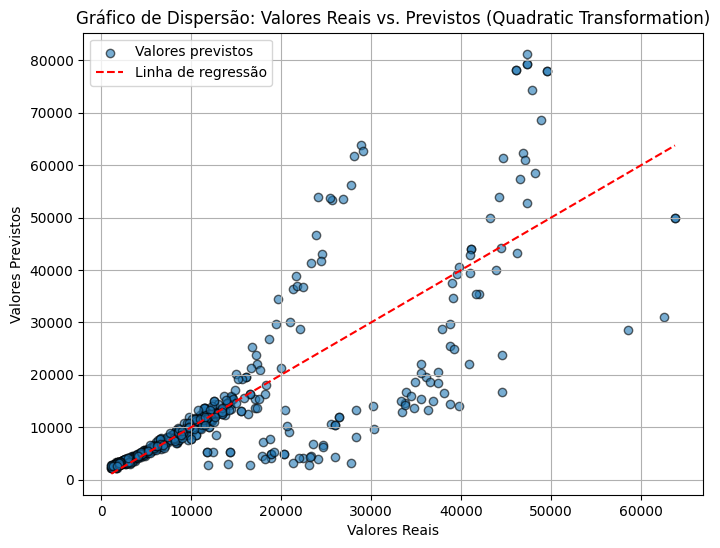

In [58]:
# prompt: quero testar com transformação quadrática

# Criando a variável quadrática para 'bmi'
df['bmi_squared'] = df['bmi']**2

# Dividindo o dataset em treino e teste após a transformação
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Treinando o modelo com a variável transformada
model_quad = smf.ols(formula='log_charges ~ age + bmi + bmi_squared + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes',
                    data=train_df).fit()

print(model_quad.summary())

# Fazendo previsões no conjunto de teste com o modelo transformado
y_pred_quad = model_quad.predict(test_df)

# Aplicando a transformação inversa para obter as previsões na escala original
y_pred = np.expm1(y_pred_quad)
y_true = np.expm1(test_df['log_charges'])

# Calculando o Erro Quadrático Médio para o modelo transformado
mse_quad = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio (Quadratic Transformation): {mse_quad:.2f}")

# Gráfico de dispersão para o modelo transformado
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', label='Valores previstos')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Linha de regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previstos (Quadratic Transformation)')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# prompt: quero testar com transformação quadrática

# Criando a variável quadrática para 'bmi'
df['age_squared'] = df['age']**2

# Dividindo o dataset em treino e teste após a transformação
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Treinando o modelo com a variável transformada
model_quad = smf.ols(formula='charges ~ age_squared + bmi + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes',
                    data=train_df).fit()

print(model_quad.summary())

# Fazendo previsões no conjunto de teste com o modelo transformado
y_pred_quad = model_quad.predict(test_df)

# Aplicando a transformação inversa para obter as previsões na escala original
y_pred = np.expm1(y_pred_quad)
y_true = np.expm1(test_df['log_charges'])

# Calculando o Erro Quadrático Médio para o modelo transformado
mse_quad = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio (Quadratic Transformation): {mse_quad:.2f}")

# Gráfico de dispersão para o modelo transformado
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', label='Valores previstos')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Linha de regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previstos (Quadratic Transformation)')
plt.legend()
plt.grid(True)
plt.show()


PatsyError: Error evaluating factor: NameError: name 'charges' is not defined
    charges ~ age_squared + bmi + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes
    ^^^^^^^